# Lidar Data Compared to Ground Measurements: Understanding Uncertainty

## Set up your analysis

Note that `earthpy` will be downloaded to `~` > `earth-analytics` > `data` >`spatial-vector-lidar`.

In [1]:
import os
import pathlib

import pandas as pd
import earthpy as et
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rxr
import rasterstats as rs
import seaborn as sns

# import required functions
import NEONLidarPipeline as nlp

In [2]:
et.data.get_data("spatial-vector-lidar")

home_dir = os.path.join(
    pathlib.Path.home(),
    "earth-analytics",
    "data",
    "spatial-vector-lidar"
)
os.chdir(home_dir)

## SJER Lidar vs Insitu Comparison Plots

Use the NEONLidarPipeline functionality to retreive SJER Lidar data and plot.

In [3]:
sjer = nlp.NEONLidarPipeline("sjer", "_")
sjer_df = sjer.merge_insitu_data(site_name="sjer")

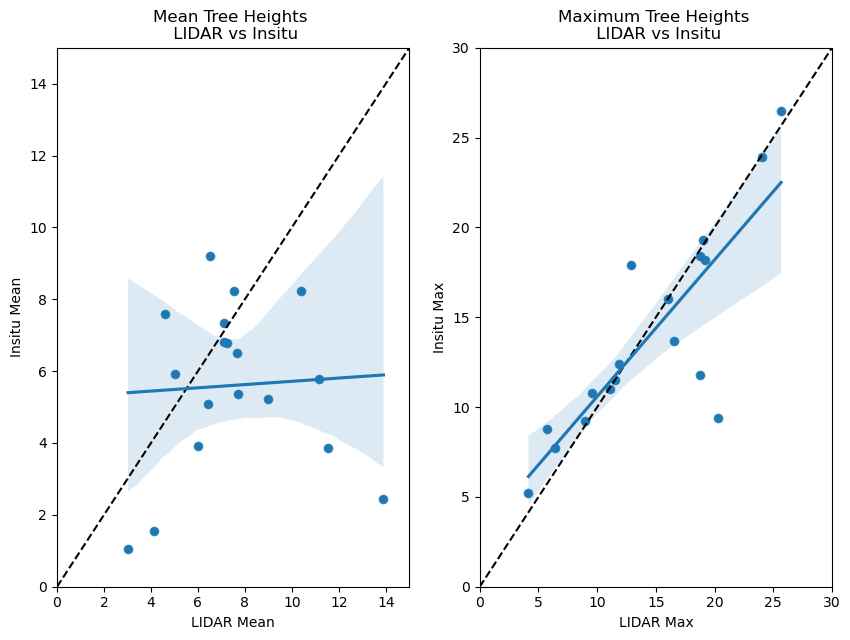

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7))

sjer_df.plot(x='lidar_mean', y='insitu_canopy_ht_mean', kind='scatter', ax=ax1,
             xlim=(0, 15), ylim=(0, 15))
ax1.plot((0, 1), (0, 1), transform=ax1.transAxes, ls='--', c='k')
sns.regplot(x='lidar_mean', y='insitu_canopy_ht_mean', data=sjer_df, ax=ax1)
ax1.set(xlabel='LIDAR Mean',
        ylabel='Insitu Mean',
        title='Mean Tree Heights \n LIDAR vs Insitu')

sjer_df.plot(x='lidar_max', y='insitu_canopy_ht_max', kind='scatter', ax=ax2,
             xlim=(0, 30), ylim=(0, 30))
ax2.plot((0, 1), (0, 1), transform=ax2.transAxes, ls='--', c='k')
sns.regplot(x='lidar_max', y='insitu_canopy_ht_max', data=sjer_df, ax=ax2)
ax2.set(xlabel='LIDAR Max',
        ylabel='Insitu Max',
        title='Maximum Tree Heights \n LIDAR vs Insitu')

plt.show()

## SOAP Lidar vs Insitu Comparison Plots

Use the NEONLidarPipeline functionality to retreive SOAP Lidar data and plot.

In [5]:
soap = nlp.NEONLidarPipeline("soap", "-")
soap_df = soap.merge_insitu_data(site_name="soap")

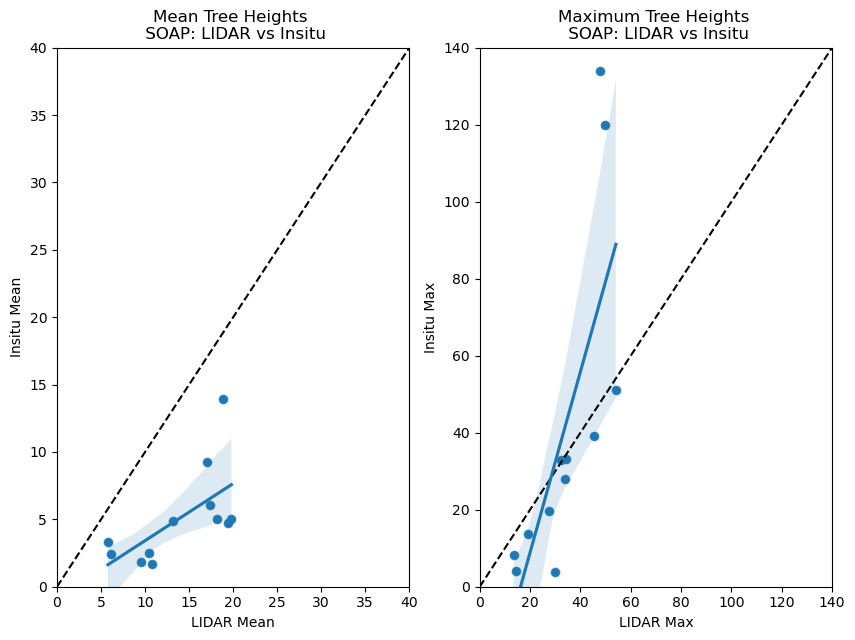

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7))

soap_df.plot(x='lidar_mean', y='insitu_canopy_ht_mean', kind='scatter', ax=ax1,
             xlim=(0, 40), ylim=(0, 40))
ax1.plot((0, 1), (0, 1), transform=ax1.transAxes, ls='--', c='k')
sns.regplot(x='lidar_mean', y='insitu_canopy_ht_mean', data=soap_df, ax=ax1)
ax1.set(xlabel='LIDAR Mean',
        ylabel='Insitu Mean',
        title='Mean Tree Heights \n SOAP: LIDAR vs Insitu')

soap_df.plot(x='lidar_max', y='insitu_canopy_ht_max', kind='scatter', ax=ax2,
             xlim=(0, 140), ylim=(0, 140))
ax2.plot((0, 1), (0, 1), transform=ax2.transAxes, ls='--', c='k')
sns.regplot(x='lidar_max', y='insitu_canopy_ht_max', data=soap_df, ax=ax2)
ax2.set(xlabel='LIDAR Max',
        ylabel='Insitu Max',
        title='Maximum Tree Heights \n SOAP: LIDAR vs Insitu')

plt.show()